### **TP Final Análisis de Datos:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 1 - Introducción:
Este trabajo evaluó y comparó la performance (en un set de datos determinado) de la clasificación de diferentes modelos, como por ejemplo *k-vecinos cercanos*, *árboles de decisón*, etc.

Para ello se usó una base de datos con diferentes atributos asociados a tumores mamarios. A partir de técnicas de procesamiento imagenes utilizando un clasificador inductivo basado en programación lineal, se creó un sistema de alta precisión para el diagnóstico de tumores de mama (Wolberg y otros, 1992).

A partir de muestras tomadas mediante jeringa y con una interfaz interactiva, se inicializaron modelos de contorno activos, conocidos como *snakes*, cerca de los límites de un conjunto de núcleos celulares.

Las *snakes* personalizadas se deforman con la forma exacta de los núcleos. Esto permite un análisis preciso y automatizado del tamaño, la forma y la textura del núcleo. Se calculan diez características para cada núcleo, definiendo su el valor medio, el valor más grande (o peor) y la desviación estándar de cada característica para cada tumor en particular. Por ejemplo, el radio medio se calcula como la media de la distancia del centro de la célula hasta cada punto del perímetro.

El set de Datos utilizado lleva el nombre de *Conjunto de datos Breast Cancer Wisconsin (Diagnostic)* (Wolberg y otros, 1995).

Contiene características/atributos obtenidas a partir de imágenes digitales de células mamarias, como el radio, la textura, perímetro, y otras características. Se lo puede encontrar en el siguiente link:

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Información adicional

Como se mencionó, las características se calculan a partir de una imágenes de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en http://www.cs.wisc.edu/~street/images/




Los atributos categóricos son:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`ID` | Número de registro. | adimensional
`diagnosis` | Clasificación en maligno o benigno. | adimensional           

Los atributos continuos para un determinado tumor son calculados a partir de varias mediciones de una misma variable a partir de su correspondiente imagenes.
Por ende, los siguientes atributos tendrán valor medio, desviación estándar y el peor valor (el que más tiende a un diagnóstico de maligno para ese tumor en particular).

Atributo | Descripción | Unidad
:---: | :---: | :---:
`radio` | Distancia media desde el centro a los puntos en el perímetro. | μm
`texture` | Desviación standard media de la escala de grises de la imagen. | adimensional
`perimeter` | Perímetro medio del tumor. | μm
`area` | Área media del tumor. | μm^2          
`smoothness` | Variación local media de la longitud del radio. | adimensional     
`compactness` | Valor medio de la compactación: perimeter^2 / area - 1.0. | adimensional
`concavity` | Valor medio de la concavidad. | adimensional            
`concave_points` | Valor medio de número de porciones cóncavas del contorno. | adimensional        
`symmetry` | Valor de simetría media. | adimensional            
`fractal_dimension` | Valor medio de "coastline approximation" - 1. | adimensional


In [ ]:
"""
Este script permite realizar un tratamiento a los datos
para ser luego utilizados por modelos de clasificación.
"""

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Se importan las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
# Se define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_padre = os.path.dirname(directorio_actual)
directorio_datos = directorio_padre + '/Data/data_sin_procesar.xlsx'

## 2 - Objetivos:

Realizar un tratamiento de los datos para ser usados:

Retomando desde el el tratamiento de *ouliers*:

2.1 - Definir un umbral para *outliers*, identificarlos y tratarlos.

2.2 - Escalamiento de variables.

2.3 - Aplicar una Selección 'Backward' de características.

In [23]:
# Se carga el DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

In [24]:
# Elimina ID que no contribuye, y se muestran los primeros 5 registros
df = df.drop(columns=['ID'])
df.head()

,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.1 - Tratamiento de Outliers

In [25]:
def outliers(df, multiplo):
  """
  Nos permite definir umbrales de outliers,
  y detectar estos últimos.

  :param:
  :df: DataFrame con los atributos.
  :multiplo: Cantidad de desvíos estándar para definir
             umbral de 'outliers'.
  """
  # Se recorre cada característica
  features = df.columns
  for feature in features[1:]:
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - multiplo * std
    upper_bound = mean + multiplo * std
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Crea una nueva figura para cada boxplot
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel(feature)
    plt.axvline(x=lower_bound, color='r', linestyle='--')
    plt.axvline(x=upper_bound, color='r', linestyle='--')
    plt.show()

    print(f"Número de outliers en {feature}: {outliers[feature].count()}.\nLo que representa un {round(100*(outliers[feature].count()/df.shape[0]),1)} % del total de registros.\n")
    print(f'Outliers en {feature} (considerando 3 desvíos estándar):')
    print(outliers[feature])
    print('\n')

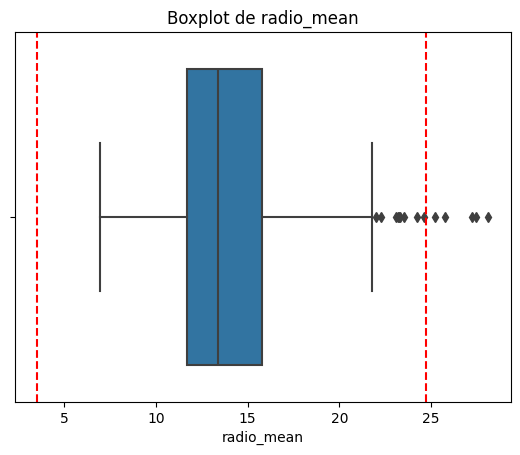

Número de outliers en radio_mean: 5.
Lo que representa un 0.9 % del total de registros.

Outliers en radio_mean (considerando 3 desvíos estándar):
82     25.22
180    27.22
212    28.11
352    25.73
461    27.42
Name: radio_mean, dtype: float64




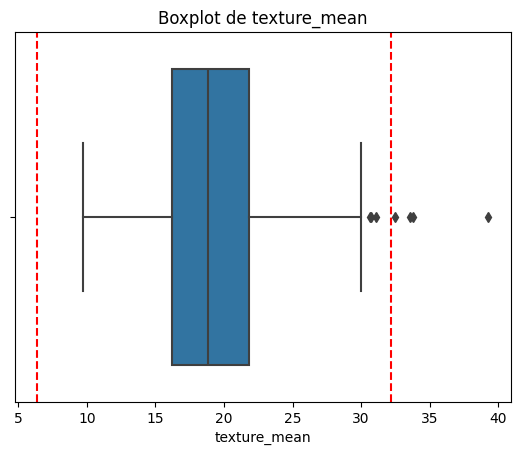

Número de outliers en texture_mean: 4.
Lo que representa un 0.7 % del total de registros.

Outliers en texture_mean (considerando 3 desvíos estándar):
219    32.47
232    33.81
239    39.28
259    33.56
Name: texture_mean, dtype: float64




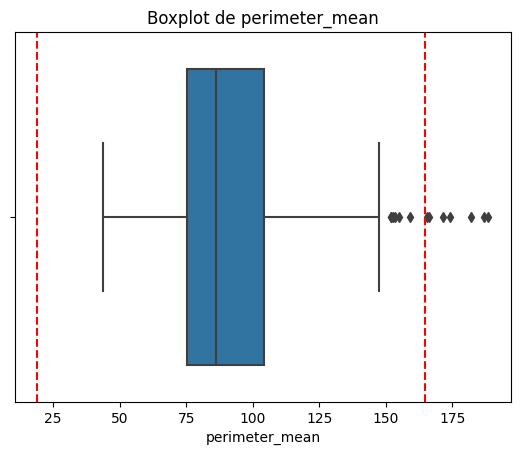

Número de outliers en perimeter_mean: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en perimeter_mean (considerando 3 desvíos estándar):
82     171.5
122    166.2
180    182.1
212    188.5
352    174.2
461    186.9
521    165.5
Name: perimeter_mean, dtype: float64




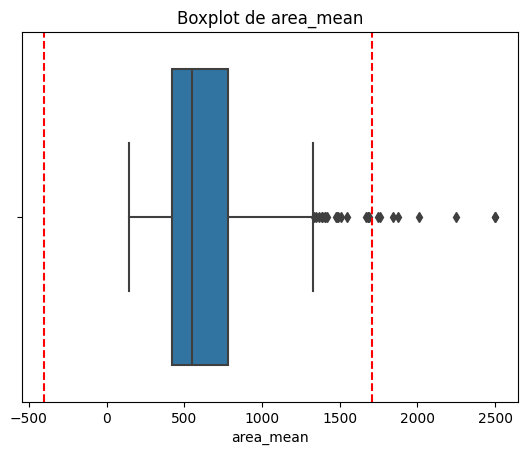

Número de outliers en area_mean: 8.
Lo que representa un 1.4 % del total de registros.

Outliers en area_mean (considerando 3 desvíos estándar):
82     1878.0
122    1761.0
180    2250.0
212    2499.0
339    1747.0
352    2010.0
461    2501.0
521    1841.0
Name: area_mean, dtype: float64




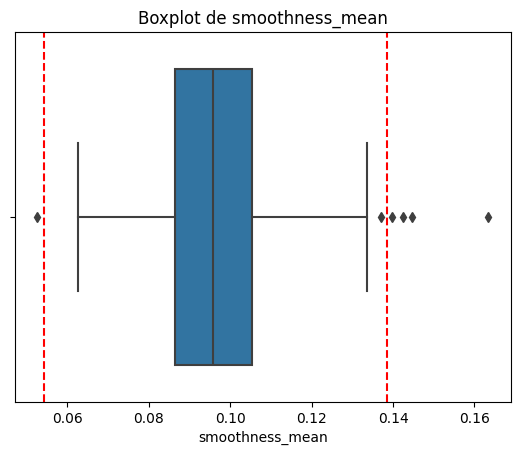

Número de outliers en smoothness_mean: 5.
Lo que representa un 0.9 % del total de registros.

Outliers en smoothness_mean (considerando 3 desvíos estándar):
3      0.14250
105    0.13980
122    0.14470
504    0.16340
568    0.05263
Name: smoothness_mean, dtype: float64




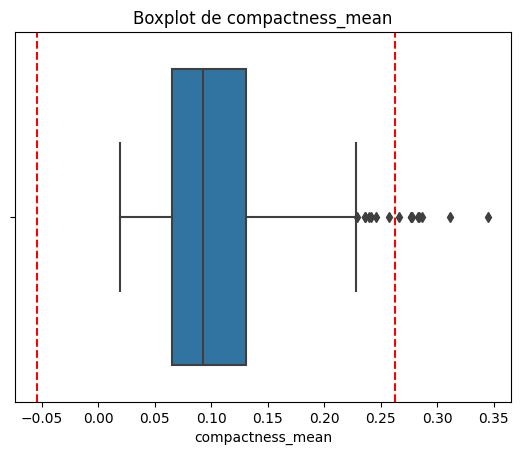

Número de outliers en compactness_mean: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en compactness_mean (considerando 3 desvíos estándar):
0      0.2776
3      0.2839
78     0.3454
82     0.2665
108    0.2768
122    0.2867
181    0.2832
258    0.3114
567    0.2770
Name: compactness_mean, dtype: float64




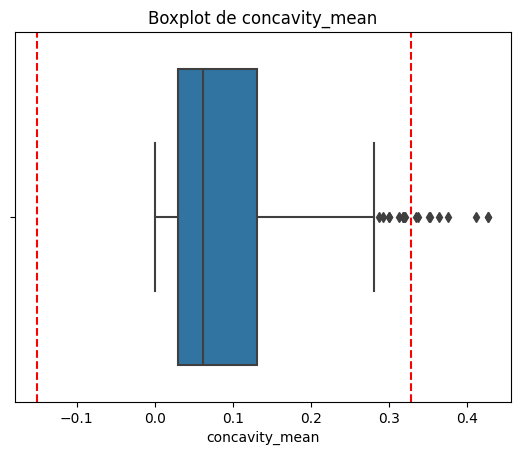

Número de outliers en concavity_mean: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en concavity_mean (considerando 3 desvíos estándar):
78     0.3754
82     0.3339
108    0.4264
122    0.4268
152    0.4108
202    0.3523
352    0.3368
461    0.3635
567    0.3514
Name: concavity_mean, dtype: float64




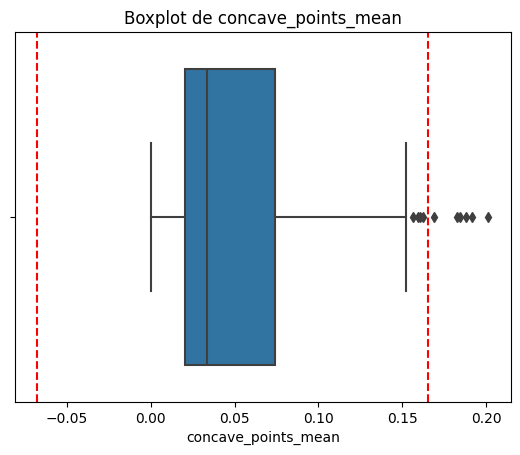

Número de outliers en concave_points_mean: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en concave_points_mean (considerando 3 desvíos estándar):
82     0.1845
108    0.1823
122    0.2012
180    0.1878
352    0.1913
461    0.1689
Name: concave_points_mean, dtype: float64




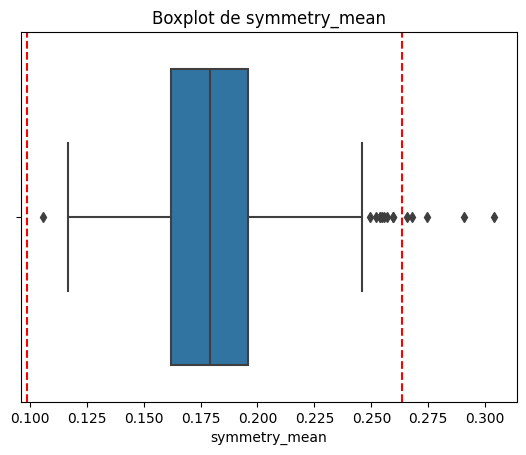

Número de outliers en symmetry_mean: 5.
Lo que representa un 0.9 % del total de registros.

Outliers en symmetry_mean (considerando 3 desvíos estándar):
25     0.3040
60     0.2743
78     0.2906
122    0.2655
146    0.2678
Name: symmetry_mean, dtype: float64




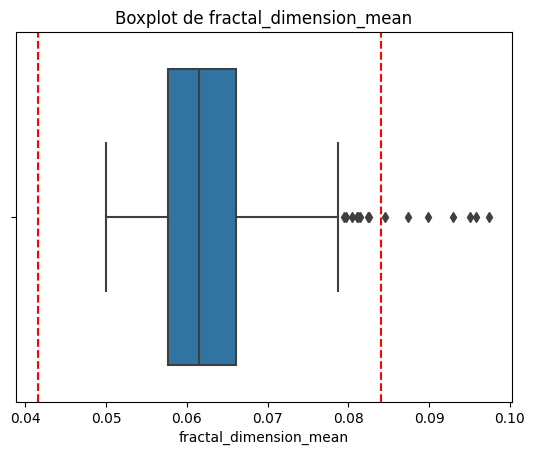

Número de outliers en fractal_dimension_mean: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en fractal_dimension_mean (considerando 3 desvíos estándar):
3      0.09744
71     0.08980
152    0.09296
318    0.08743
376    0.08450
504    0.09502
505    0.09575
Name: fractal_dimension_mean, dtype: float64




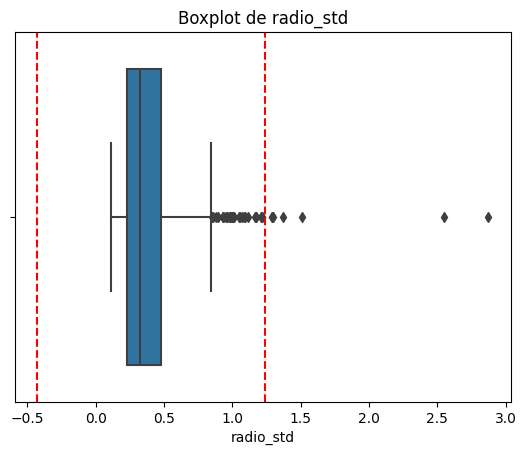

Número de outliers en radio_std: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en radio_std (considerando 3 desvíos estándar):
122    1.509
138    1.296
212    2.873
258    1.292
417    1.370
461    2.547
503    1.291
Name: radio_std, dtype: float64




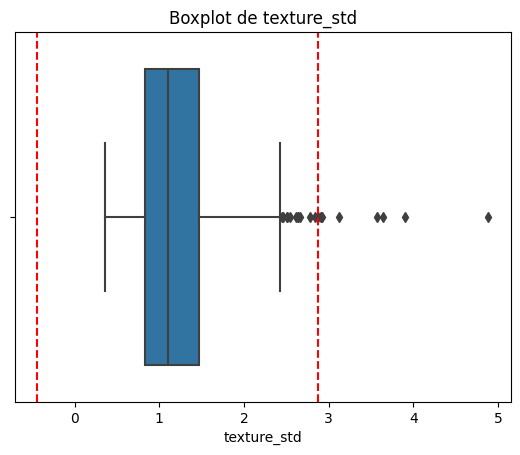

Número de outliers en texture_std: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en texture_std (considerando 3 desvíos estándar):
12     3.568
83     2.910
122    3.120
192    4.885
416    2.878
473    3.647
557    2.927
559    2.904
561    3.896
Name: texture_std, dtype: float64




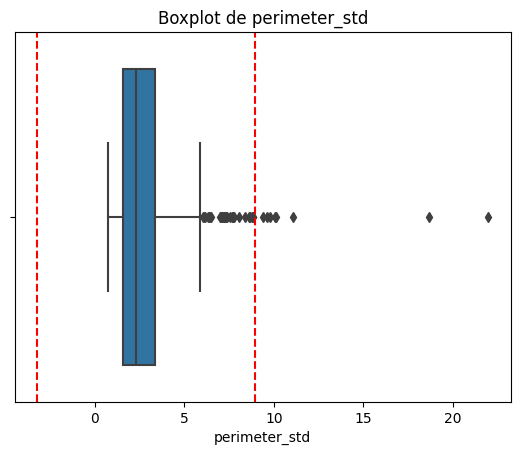

Número de outliers en perimeter_std: 8.
Lo que representa un 1.4 % del total de registros.

Outliers en perimeter_std (considerando 3 desvíos estándar):
12     11.070
108    10.050
122     9.807
212    21.980
258    10.120
417     9.424
461    18.650
503     9.635
Name: perimeter_std, dtype: float64




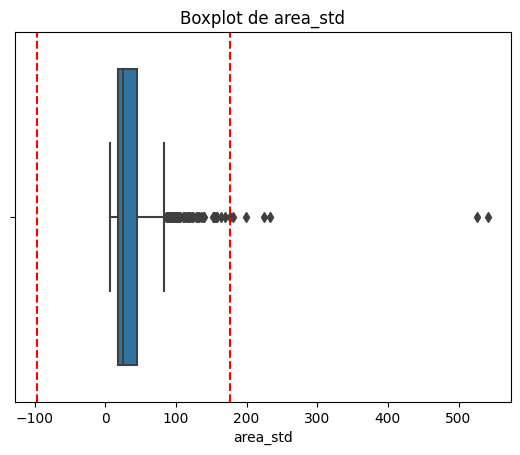

Número de outliers en area_std: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en area_std (considerando 3 desvíos estándar):
122    233.0
212    525.6
265    199.7
368    224.1
461    542.2
503    180.2
Name: area_std, dtype: float64




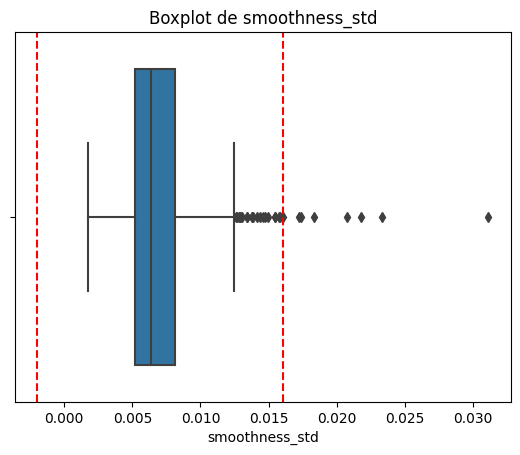

Número de outliers en smoothness_std: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en smoothness_std (considerando 3 desvíos estándar):
71     0.01721
116    0.01835
122    0.02333
213    0.03113
314    0.02075
345    0.01736
505    0.02177
Name: smoothness_std, dtype: float64




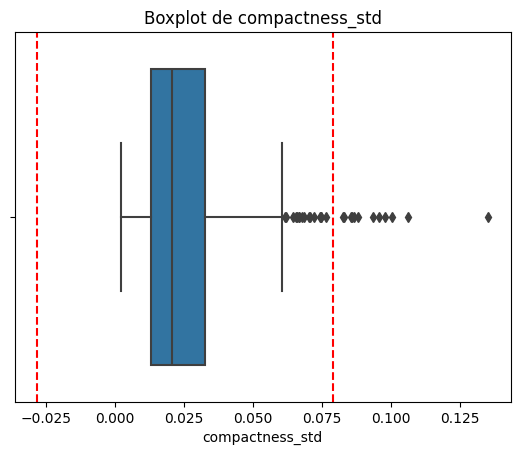

Número de outliers en compactness_std: 12.
Lo que representa un 2.1 % del total de registros.

Outliers en compactness_std (considerando 3 desvíos estándar):
12     0.08297
42     0.10060
68     0.08606
71     0.09368
108    0.08668
122    0.09806
152    0.09586
176    0.08808
190    0.13540
213    0.08555
288    0.08262
290    0.10640
Name: compactness_std, dtype: float64




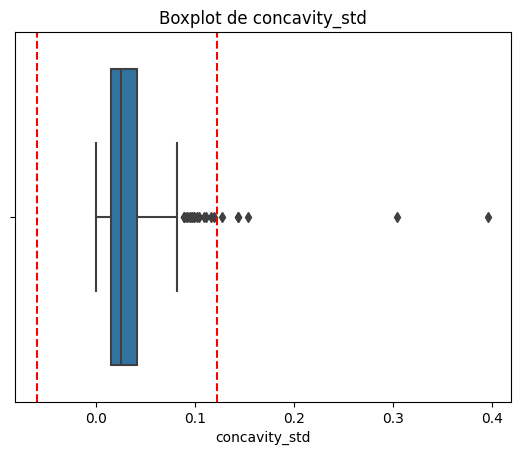

Número de outliers en concavity_std: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en concavity_std (considerando 3 desvíos estándar):
68     0.3038
112    0.1435
122    0.1278
152    0.3960
213    0.1438
376    0.1535
Name: concavity_std, dtype: float64




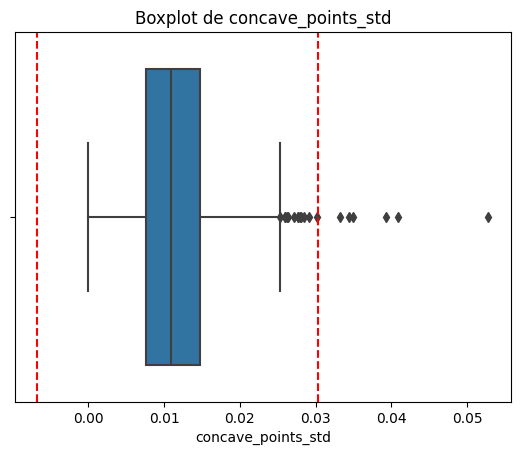

Número de outliers en concave_points_std: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en concave_points_std (considerando 3 desvíos estándar):
12     0.04090
68     0.03322
152    0.05279
213    0.03927
288    0.03487
389    0.03441
Name: concave_points_std, dtype: float64




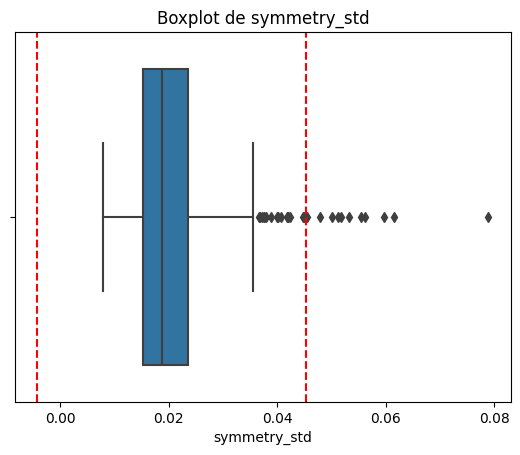

Número de outliers en symmetry_std: 11.
Lo que representa un 1.9 % del total de registros.

Outliers en symmetry_std (considerando 3 desvíos estándar):
3      0.05963
42     0.05333
78     0.07895
119    0.05014
122    0.04547
138    0.05168
146    0.05628
190    0.05113
212    0.04783
314    0.06146
351    0.05543
Name: symmetry_std, dtype: float64




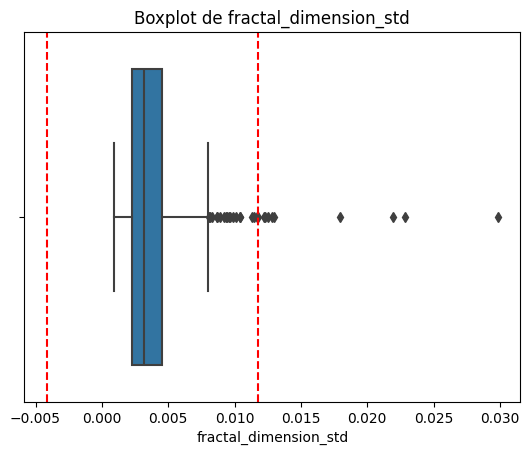

Número de outliers en fractal_dimension_std: 10.
Lo que representa un 1.8 % del total de registros.

Outliers en fractal_dimension_std (considerando 3 desvíos estándar):
12     0.01284
71     0.02193
112    0.01298
151    0.01178
152    0.02984
176    0.01792
213    0.01256
290    0.02286
376    0.01220
388    0.01233
Name: fractal_dimension_std, dtype: float64




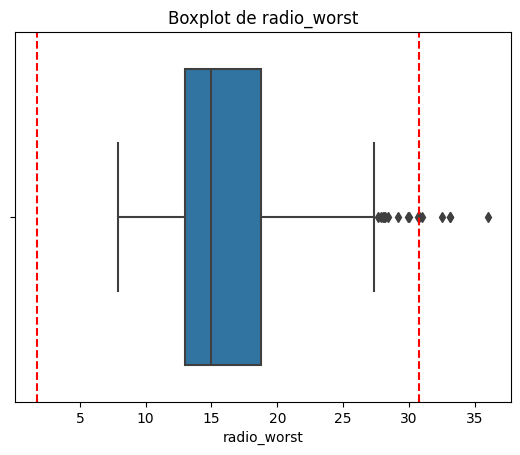

Número de outliers en radio_worst: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en radio_worst (considerando 3 desvíos estándar):
180    33.12
236    31.01
265    32.49
352    33.13
461    36.04
503    30.79
Name: radio_worst, dtype: float64




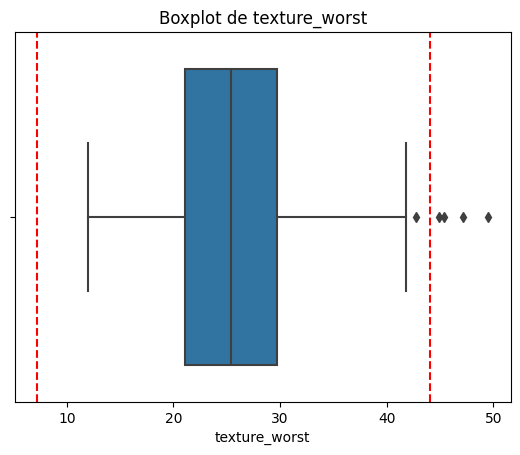

Número de outliers en texture_worst: 4.
Lo que representa un 0.7 % del total de registros.

Outliers en texture_worst (considerando 3 desvíos estándar):
219    45.41
239    44.87
259    49.54
265    47.16
Name: texture_worst, dtype: float64




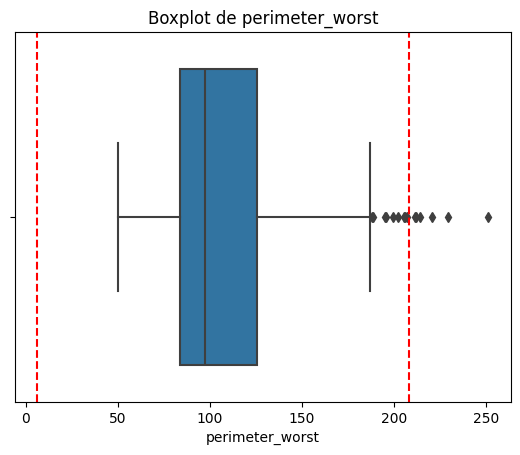

Número de outliers en perimeter_worst: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en perimeter_worst (considerando 3 desvíos estándar):
82     211.7
180    220.8
265    214.0
352    229.3
461    251.2
503    211.5
Name: perimeter_worst, dtype: float64




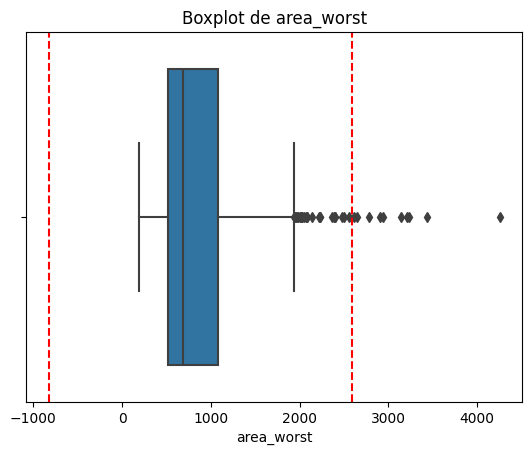

Número de outliers en area_worst: 10.
Lo que representa un 1.8 % del total de registros.

Outliers en area_worst (considerando 3 desvíos estándar):
23     2615.0
180    3216.0
236    2944.0
265    3432.0
339    2906.0
352    3234.0
368    3143.0
461    4254.0
503    2782.0
521    2642.0
Name: area_worst, dtype: float64




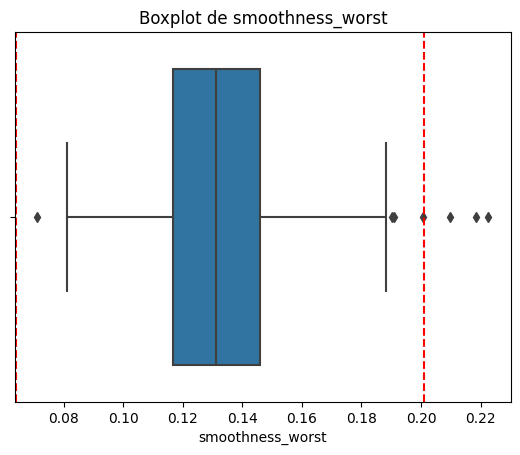

Número de outliers en smoothness_worst: 3.
Lo que representa un 0.5 % del total de registros.

Outliers en smoothness_worst (considerando 3 desvíos estándar):
3      0.2098
203    0.2226
379    0.2184
Name: smoothness_worst, dtype: float64




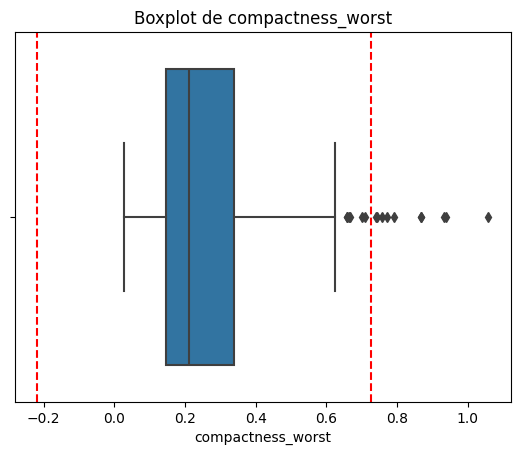

Número de outliers en compactness_worst: 10.
Lo que representa un 1.8 % del total de registros.

Outliers en compactness_worst (considerando 3 desvíos estándar):
3      0.8663
9      1.0580
14     0.7725
42     0.7444
72     0.7394
181    0.7584
190    0.9327
379    0.9379
562    0.7917
567    0.8681
Name: compactness_worst, dtype: float64




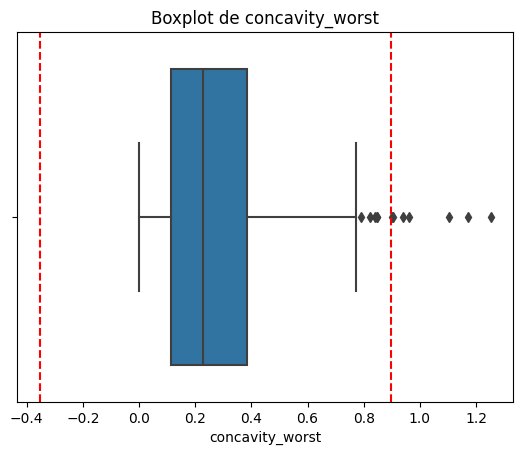

Número de outliers en concavity_worst: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en concavity_worst (considerando 3 desvíos estándar):
9      1.1050
68     1.2520
108    0.9608
400    0.9034
430    0.9019
562    1.1700
567    0.9387
Name: concavity_worst, dtype: float64




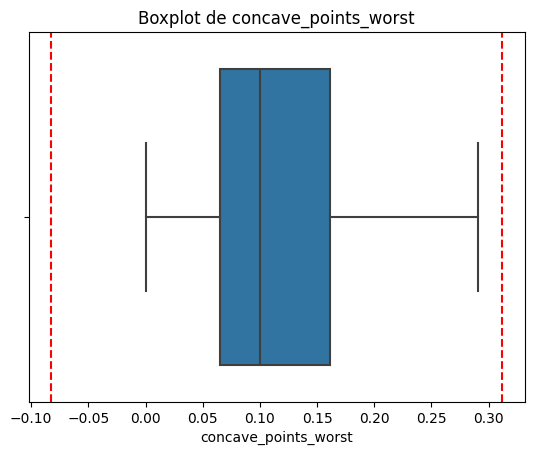

Número de outliers en concave_points_worst: 0.
Lo que representa un 0.0 % del total de registros.

Outliers en concave_points_worst (considerando 3 desvíos estándar):
Series([], Name: concave_points_worst, dtype: float64)




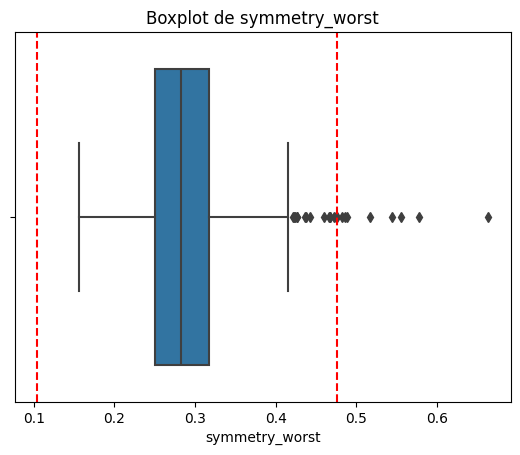

Número de outliers en symmetry_worst: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en symmetry_worst (considerando 3 desvíos estándar):
3      0.6638
31     0.4761
35     0.4863
78     0.5440
119    0.4882
146    0.5774
190    0.5166
323    0.5558
370    0.4824
Name: symmetry_worst, dtype: float64




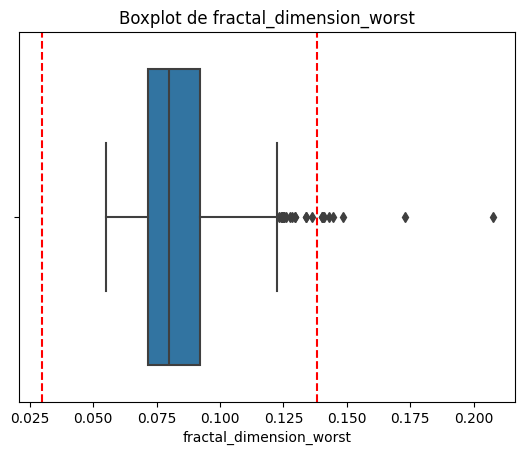

Número de outliers en fractal_dimension_worst: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en fractal_dimension_worst (considerando 3 desvíos estándar):
3      0.1730
9      0.2075
14     0.1431
31     0.1402
105    0.1405
151    0.1486
190    0.1446
379    0.1403
562    0.1409
Name: fractal_dimension_worst, dtype: float64




In [26]:
outliers(df, 3)

In [27]:
def poda(df, multiplo):
    """
    Elimina mediante poda los registros donde al menos
    una de las características presente un outliers
    con el umbral definido.

    :param:
    :df: DataFrame con los atributos.
    :multiplo: Cantidad de desvíos estándar para definir
                umbral de 'outliers'.    
    """
    # Seleccionamos solo las columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calculamos el umbral de outliers para cada columna numérica
    thresholds = {}
    for column in numeric_columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        thresholds[column] = (mean - 3 * std_dev, mean + 3 * std_dev)

    # Filtramos el DataFrame para eliminar registros con outliers
    filtered_df = df.copy()
    for column, (lower, upper) in thresholds.items():
        filtered_df = filtered_df[(filtered_df[column] > lower) & (filtered_df[column] < upper)]

    return filtered_df

In [28]:
df = poda(df, 3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 1 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                495 non-null    object 
 1   radio_mean               495 non-null    float64
 2   texture_mean             495 non-null    float64
 3   perimeter_mean           495 non-null    float64
 4   area_mean                495 non-null    float64
 5   smoothness_mean          495 non-null    float64
 6   compactness_mean         495 non-null    float64
 7   concavity_mean           495 non-null    float64
 8   concave_points_mean      495 non-null    float64
 9   symmetry_mean            495 non-null    float64
 10  fractal_dimension_mean   495 non-null    float64
 11  radio_std                495 non-null    float64
 12  texture_std              495 non-null    float64
 13  perimeter_std            495 non-null    float64
 14  area_std                 495 no

El método de poda se aplicó para todos los registros donde al menos se encontrara una característica donde se ubicara un *outlier* según el umbral propuesto de 3 desvíos estándar. Con estos resultados, se observó que el dataframe disminuyó su cantidad de registros en un 12,5% (de 495 a 546), lo cual no parece significativo a priori.

### 2.2 - Escalamiento de variables

En este caso se decidió estandarizar las características del dataframe dado que presentan rangos variables.

In [30]:
def escalado(df, ini_col, fin_col):
    """
    Escala las columnas, dentro del rango
    indicado, del dataframe de entrada.

    :param:
    :df: DataFrame con los atributos.
    :col_ini: Columna a partir de la cual eliminar.
    :col_fin: Columna hasta la cual eliminar.

    """
    # Normalizar columnas desde fin_col a fin_col
    cols_to_normalize = df.columns[ini_col:fin_col]

    df_normalized = df.copy()

    for col in cols_to_normalize:
        mean = df[col].mean()
        std = df[col].std()
        df_normalized[col] = (df[col] - mean) / std

    return df_normalized

In [31]:
df = escalado(df, 1, 33)

In [32]:
df.head()

,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,M,2.202238,-0.282327,2.066260,2.451651,-0.806017,-0.392018,0.206748,0.825307,0.154679,...,2.213431,-0.307508,1.936911,2.506885,-0.333624,-0.355109,0.004131,1.363750,-0.176904,0.524085
2,M,1.913037,0.595076,1.926804,2.022935,1.132885,1.586513,1.997857,2.598869,1.259656,...,1.869671,0.066653,1.714395,1.961476,0.644134,1.538516,1.225135,2.343077,1.560391,0.424161
4,M,2.110219,-1.147123,2.172055,2.350572,0.407551,0.926678,2.007583,1.873838,0.141780,...,1.620324,-1.497058,1.703799,1.665586,0.311886,-0.208649,0.930410,0.959992,-0.953956,-0.325271
5,M,-0.466298,-0.804230,-0.354023,-0.507186,2.552354,1.832430,1.355975,1.154644,1.337048,...,-0.091211,-0.247501,-0.019818,-0.174674,2.291135,2.337675,1.722776,1.159293,2.309260,2.979169
6,M,1.439799,0.274875,1.426686,1.454799,-0.034668,0.347192,0.624944,0.942971,0.077287,...,1.702633,0.442579,1.739119,1.734038,0.634642,0.210034,0.804099,1.487454,0.453193,0.153533


#### 2.3 Selección Backward de características

In [33]:
# Importa las clases necesarias.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
# Divide en variables independientes (X) y dependientes (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [35]:
# Establece el modelo de base
model = LogisticRegression(solver='liblinear')

In [36]:
# Aplica RFE para seleccion de caracteristicas (implementa el método wrapper backward eliminando las características menos importantes)
rfe = RFE(model, n_features_to_select=5)  # Ajustar el número de características en 5
fit = rfe.fit(X, y)

In [37]:
# Evalua las caracteristicas seleccionadas
selected_features = X.columns[fit.support_]
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['area_std', 'compactness_std', 'area_worst', 'concavity_worst', 'concave_points_worst']


In [38]:
# Para ver el ranking de todas las características
ranking = fit.ranking_
print(f"Feature Ranking: {dict(zip(X.columns, ranking))}")

Feature Ranking: {'radio_mean': 22, 'texture_mean': 13, 'perimeter_mean': 21, 'area_mean': 15, 'smoothness_mean': 23, 'compactness_mean': 11, 'concavity_mean': 7, 'concave_points_mean': 2, 'symmetry_mean': 24, 'fractal_dimension_mean': 26, 'radio_std': 5, 'texture_std': 17, 'perimeter_std': 12, 'area_std': 1, 'smoothness_std': 25, 'compactness_std': 1, 'concavity_std': 20, 'concave_points_std': 16, 'symmetry_std': 18, 'fractal_dimension_std': 8, 'radio_worst': 6, 'texture_worst': 3, 'perimeter_worst': 4, 'area_worst': 1, 'smoothness_worst': 10, 'compactness_worst': 19, 'concavity_worst': 1, 'concave_points_worst': 1, 'symmetry_worst': 14, 'fractal_dimension_worst': 9}


Considerando los resultados de este método de selección, se utilizan las siguientes características:

|características seleccionadas|
|-----------------------------|
|area_std                     |
|compactness_std              |
|area_worst                   |
|concavity_worst              |
|concave_points_worst         |

#### 2.4 Reducción

In [40]:
# Eliminacion de campos del dataframe
def reduccion(df, lista):
  """
  Elimina las columnas, dentro del rango
  indicado, del dataframe de entrada.

  :param:
  :df: DataFrame con los atributos.
  :lista: Columna a partir de la cual eliminar.
  """
  # Crear un nuevo DataFrame solo con las columnas seleccionadas
  df_red = df[lista]
  
  return df_red

In [41]:
df =  reduccion(df, ['diagnosis', 'area_std', 'compactness_std', 'area_worst', 'concavity_worst', 'concave_points_worst'])

In [42]:
df.head()

,diagnosis,area_std,compactness_std,area_worst,concavity_worst,concave_points_worst
1,M,1.445384,-0.714444,2.506885,0.004131,1.363750
2,M,2.168978,1.416290,1.961476,1.225135,2.343077
4,M,2.183849,0.196133,1.665586,0.930410,0.959992
5,M,-0.255333,0.894268,-0.174674,1.722776,1.159293
6,M,0.713811,-0.656003,1.734038,0.804099,1.487454


Se persisten los datos procesados:

In [43]:
# Guardado del dataframe procesado

def guardar(df):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  # Especificar la ruta donde deseas guardar el archivo Excel
  ruta_excel = directorio_padre + '/Data/data_procesados_v2.xlsx'

  # Leer la ruta del archivo Excel existente
  df_existente = pd.read_excel(ruta_excel)

  # Para el archivo existente pero ya con datos
  df_concatenado = pd.concat([df_existente, df], ignore_index=True)

  # Guardar el DataFrame concatenado en el archivo Excel existente
  df_concatenado.to_excel(ruta_excel, index=False)


In [44]:
guardar(df)

Bibliografía:

Isabelle Guyon, Andre Elisseeff (2003). An introduction to variable and feature selection. Journal of Machine Learning Research 3 (2003) 1157-1182


Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


W. Street, W. Wolberg, O. Mangasarian. (1992)
Nuclear feature extraction for breast tumor diagnosis.
Published in Electronic imaging.


